# Car Price Prediction Using Linear Regression Model

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

%matplotlib widget
%matplotlib inline

## Loading Dataset

In [2]:
raw_data = pd.read_csv('car.csv')
raw_data

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,Rav 4
5,Mercedes-Benz,199999.0,crossover,0,5.50,Petrol,yes,2016,GLS 63
6,BMW,6100.0,sedan,438,2.00,Gas,yes,1997,320
7,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,A6
8,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,Megane
9,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,Golf IV


## Data Preprocessing

### Exploring the descriptive statistic of the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest

In [4]:
# Removing model attributes from dataset
data = raw_data.drop(['Model'], axis=1) 
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Showing The Number of Missing Value in Each Attribute

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### Removing All Missing Values 

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring Probabilty Distribution Function

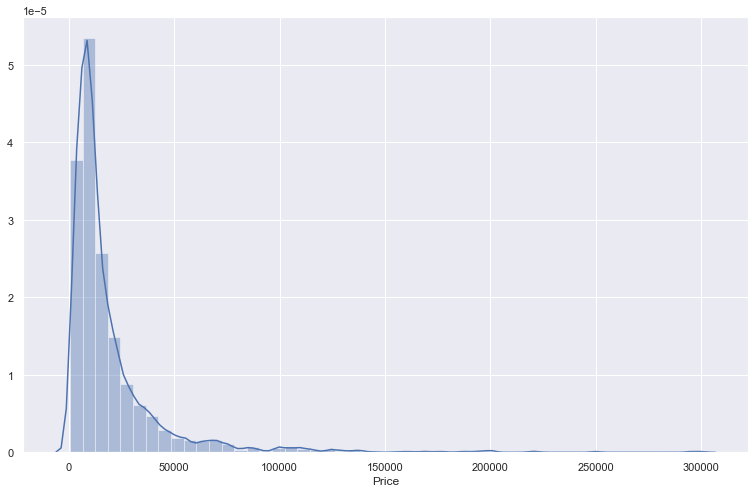

In [7]:
plt.figure(figsize=(13,8))
sns.distplot(data_no_mv['Price'])

### Dealing with outliers

In [8]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


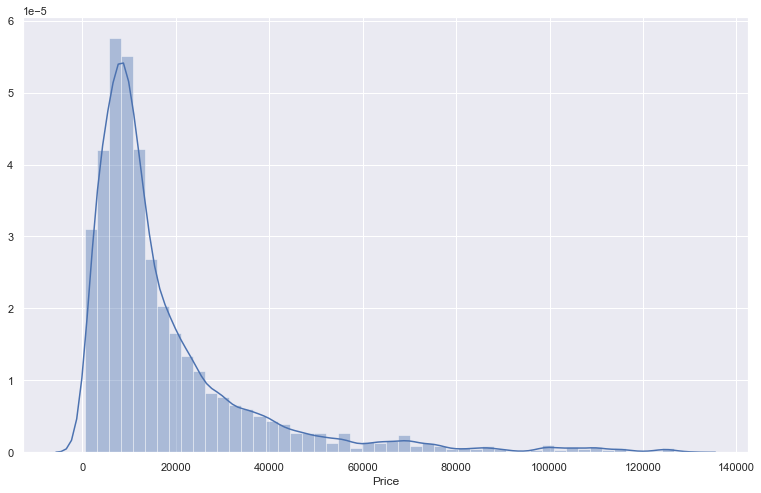

In [9]:
plt.figure(figsize=(13,8))
sns.distplot(data_1['Price'])

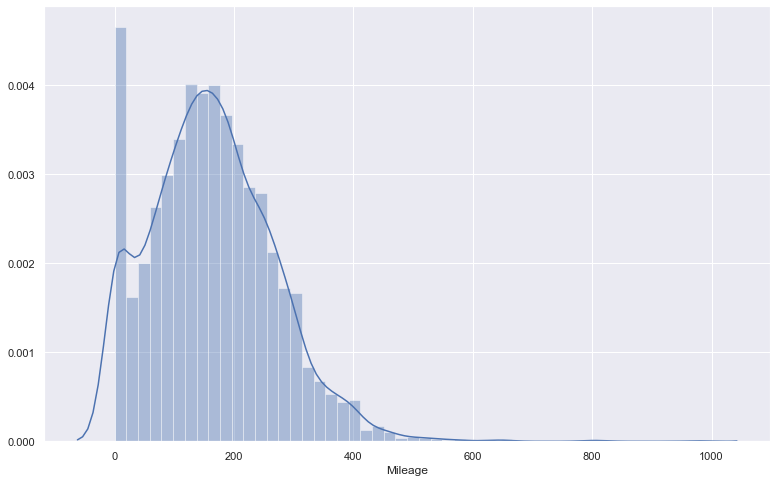

In [10]:
plt.figure(figsize=(13,8))
sns.distplot(data_no_mv['Mileage'])

In [11]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

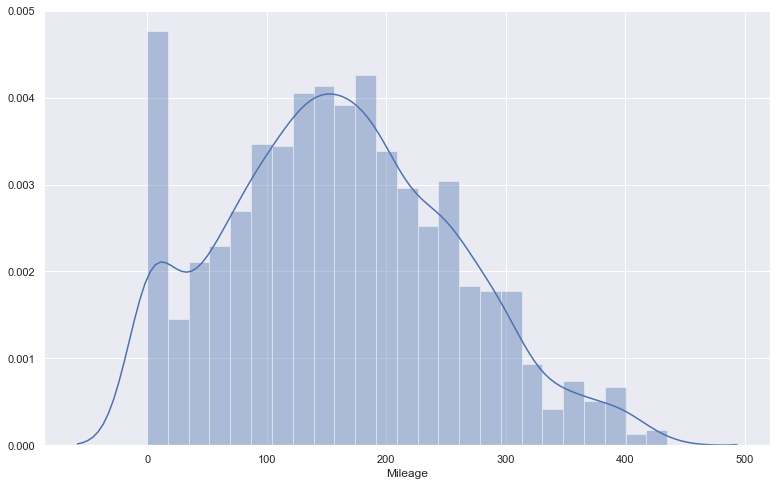

In [12]:
plt.figure(figsize=(13,8))
sns.distplot(data_2['Mileage'])

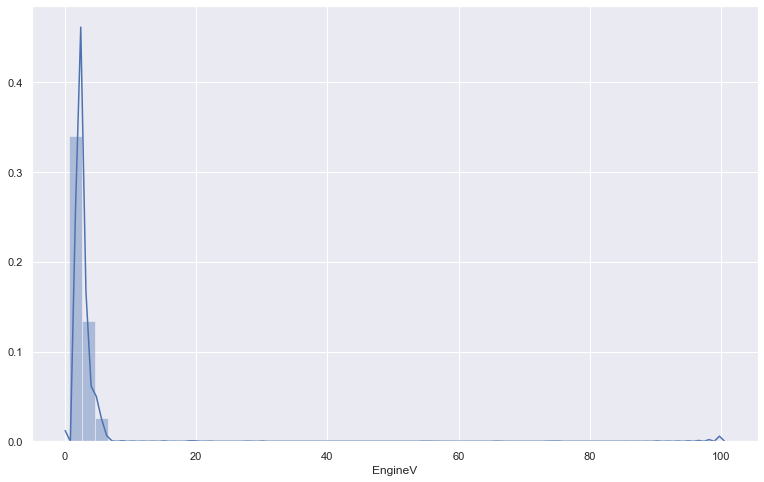

In [13]:
plt.figure(figsize=(13,8))
sns.distplot(data_no_mv['EngineV'])

In [14]:
data_3 = data_2[data_2['EngineV']<6.5] #removing all values below 6.5

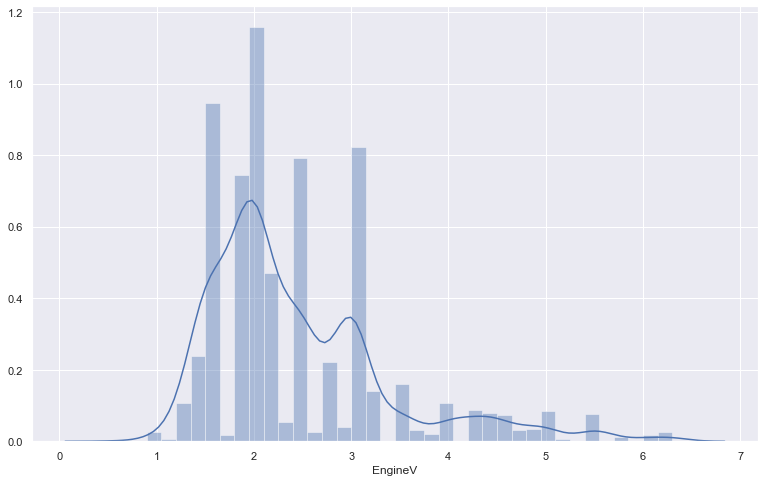

In [15]:
plt.figure(figsize=(13,8))
sns.distplot(data_3['EngineV'])

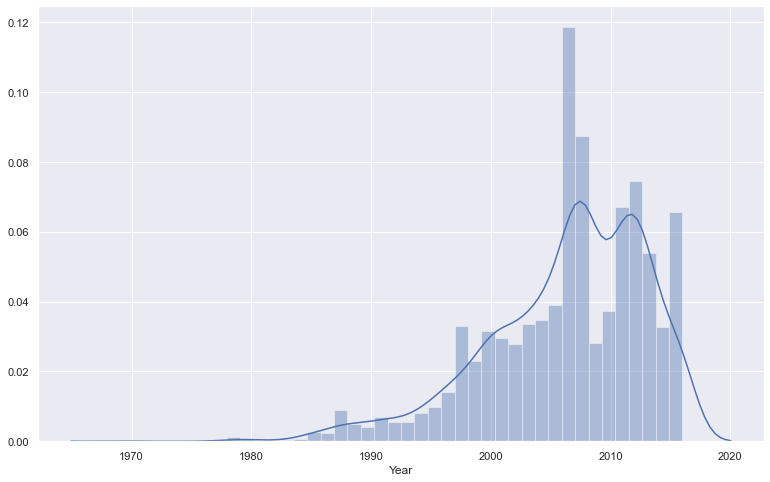

In [16]:
plt.figure(figsize=(13,8))
sns.distplot(data_no_mv['Year'])

In [17]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>q]

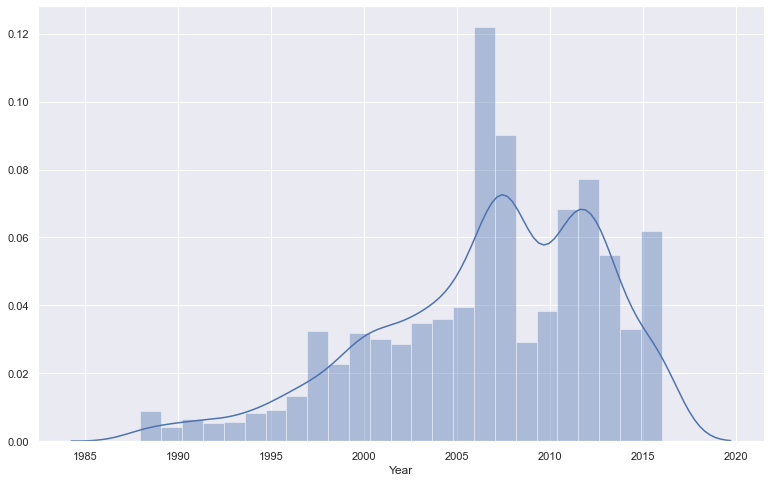

In [18]:
plt.figure(figsize=(13,8))
sns.distplot(data_4['Year'])

In [19]:
data_cleaned = data_4.reset_index(drop=True) #reseting the index

In [20]:
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3867,3867.000000,3867,3867.000000,3867.000000,3867,3867,3867.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,848,NaN,1467,NaN,NaN,1807,3505,NaN
mean,NaN,18194.455679,NaN,160.542539,2.450440,NaN,NaN,2006.709853
std,NaN,19085.855165,NaN,95.633291,0.949366,NaN,NaN,6.103870
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1988.000000
25%,NaN,7200.000000,NaN,91.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11700.000000,NaN,157.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,225.000000,3.000000,NaN,NaN,2012.000000


### Checking the OLS (Ordinary Least Squares) Assumptions

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002304C00F0F0>,
      dtype=object)

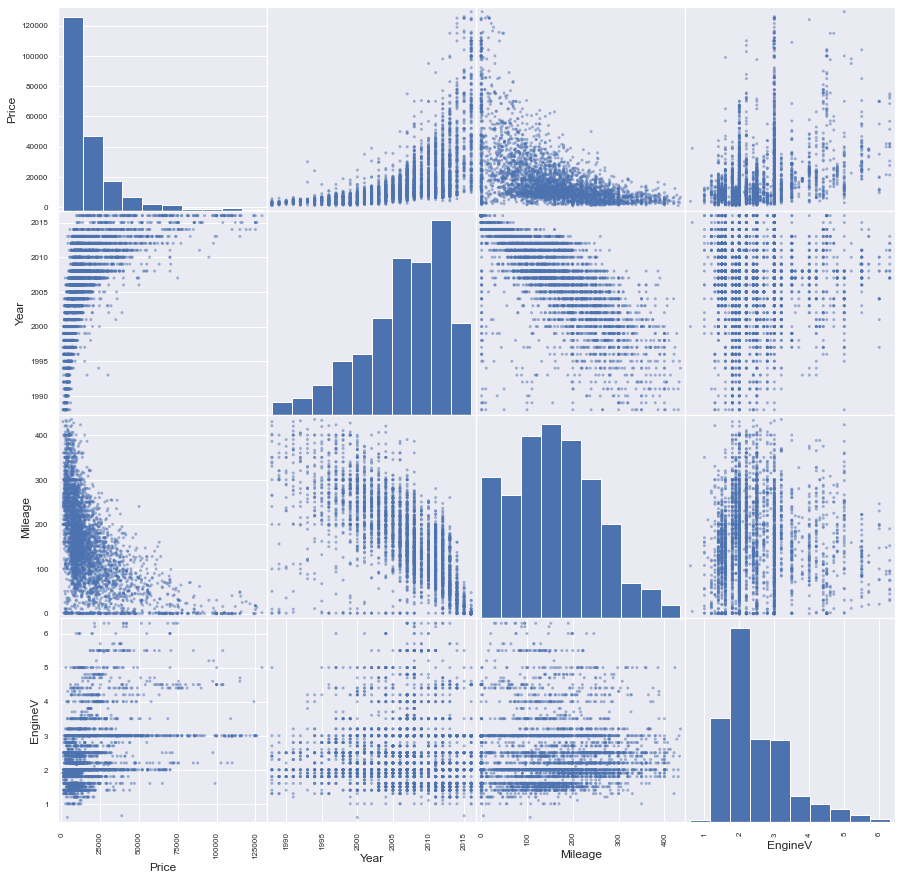

In [21]:
from pandas.plotting import scatter_matrix

attributes = ["Price", "Year", "Mileage", "EngineV"]
scatter_matrix(data_cleaned[attributes], figsize=(15,15))

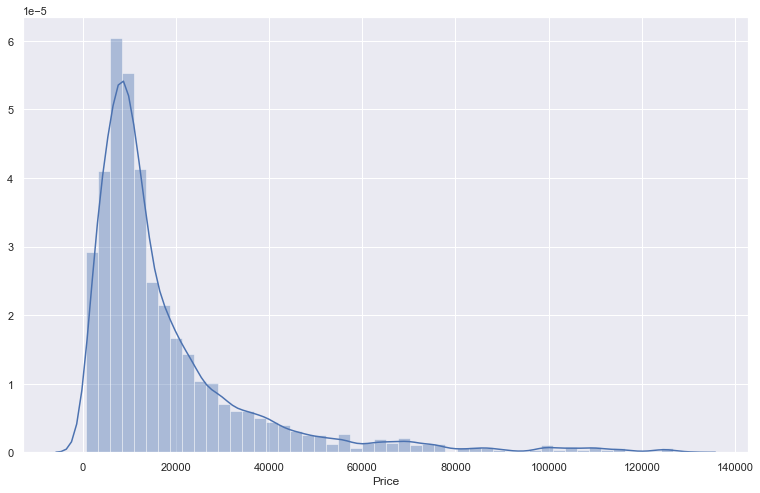

In [22]:
plt.figure(figsize=(13,8))
sns.distplot(data_cleaned['Price'])

### Relaxing the Assumptions

In [23]:
log_price = np.log(data_cleaned['Price']) # Appliying log transformation
data_cleaned['log_price'] = log_price
data_cleaned

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.00,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.90,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.00,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.20,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.00,Petrol,yes,2011,9.814656
5,Audi,14200.0,vagon,200,2.70,Diesel,yes,2006,9.560997
6,Renault,10799.0,vagon,193,1.50,Diesel,yes,2012,9.287209
7,Volkswagen,1400.0,other,212,1.80,Gas,no,1999,7.244228
8,Renault,11950.0,vagon,177,1.50,Diesel,yes,2011,9.388487
9,Renault,2500.0,sedan,260,1.79,Petrol,yes,1994,7.824046


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002304DB8E630>,
      dtype=object)

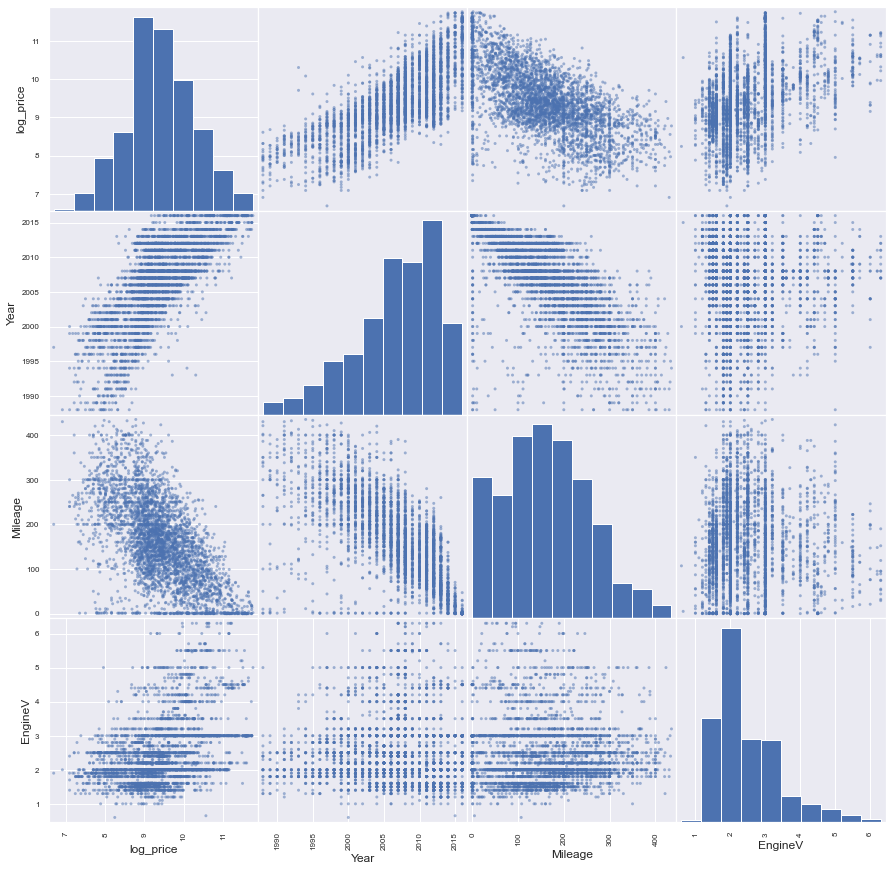

In [24]:
from pandas.plotting import scatter_matrix

attributes = ["log_price", "Year", "Mileage", "EngineV"]
scatter_matrix(data_cleaned[attributes], figsize=(15,15))

In [25]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

### Multicolinearity

In [26]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

In [27]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'Year', 'EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif["features"] = variables.columns
vif

,VIF,features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [28]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis=1)

### Dealing with Categorical Data

In [29]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True) # Creating dummy variables
data_with_dummies

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,9.560997,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,9.287209,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,7.244228,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,9.388487,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,7.824046,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [30]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [31]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']

In [32]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed

,log_price,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,9.560997,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,9.287209,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,7.244228,212,1.80,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,9.388487,177,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,7.824046,260,1.79,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


### Dividing Target and Inputs Data

In [33]:
targets = data_preprocessed['log_price']
inputs = data_preprocessed.drop(['log_price'],axis=1)

In [34]:
targets

0        8.342840
1        8.974618
2        9.495519
3       10.043249
4        9.814656
5        9.560997
6        9.287209
7        7.244228
8        9.388487
9        7.824046
10       9.159047
11       9.259131
12       9.680344
13       9.059517
14       8.003029
15      10.184900
16       8.160518
17      10.551454
18       8.922658
19       8.824678
20       9.259131
21      10.122623
22       9.942708
23       8.779557
24       9.515322
25       9.047821
26       7.972466
27       9.975808
28       9.792556
29      10.257659
          ...    
3837     9.350102
3838     9.179881
3839     9.259131
3840     9.296518
3841    10.146434
3842     9.648595
3843     9.185023
3844     9.686575
3845     9.126959
3846     8.546752
3847    11.512925
3848     9.104869
3849     9.729134
3850     9.011889
3851    10.124629
3852    11.302192
3853     8.895630
3854     9.968104
3855    10.714418
3856     8.817298
3857     8.853665
3858     9.400134
3859    10.236382
3860     7.649693
3861     8

In [35]:
inputs

,Mileage,EngineV,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.00,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.90,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.00,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.20,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.00,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1
5,200,2.70,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
6,193,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
7,212,1.80,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0
8,177,1.50,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1
9,260,1.79,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1


In [36]:
input_array = np.array(inputs)

### Scaling Input Data

In [37]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
input_scaled = scaler.fit_transform(inputs)

### Split The Data into Train and Test

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(input_scaled, targets, test_size=0.2, random_state=55)

In [39]:
len(x_train)

3093

In [40]:
len(x_test)

774

## Using Linear Regression Model

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Predicting Training Data

In [42]:
y_hat = reg.predict(x_train)

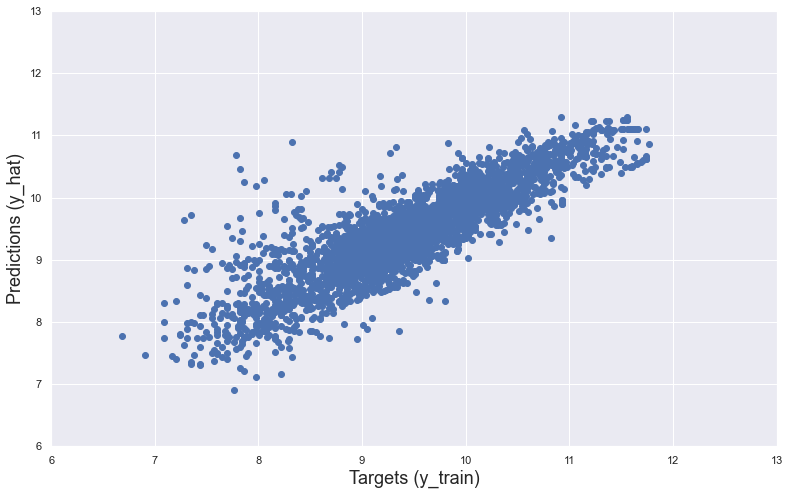

In [43]:
plt.figure(figsize=(13,8))
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residual PDF')

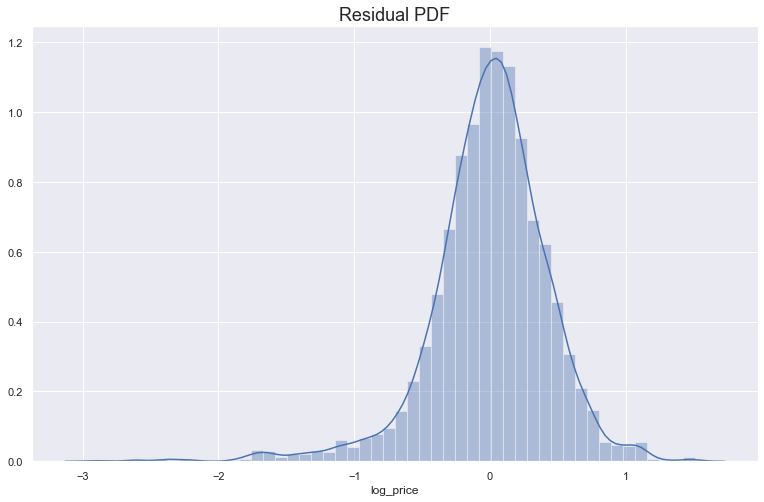

In [44]:
plt.figure(figsize=(13,8))
sns.distplot(y_train - y_hat)
plt.title('Residual PDF', size=18)

### Getting the score a.k.a model accuracy

In [45]:
reg.score(x_train, y_train)

0.7546433218542205

### Finding the weights and bias

In [46]:
reg.intercept_  # Bias

9.418402380424096

In [47]:
reg.coef_  # Weights

array([-0.46208071,  0.21996632,  0.01259177,  0.00684914, -0.1370885 ,
       -0.18497304, -0.06295502, -0.09336423, -0.14003433, -0.09578106,
       -0.19211546, -0.12053335, -0.1531249 , -0.11820237, -0.03004683,
       -0.15049615,  0.31778106])

In [48]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Mileage,-0.462081
1,EngineV,0.219966
2,Brand_BMW,0.012592
3,Brand_Mercedes-Benz,0.006849
4,Brand_Mitsubishi,-0.137089
5,Brand_Renault,-0.184973
6,Brand_Toyota,-0.062955
7,Brand_Volkswagen,-0.093364
8,Body_hatch,-0.140034
9,Body_other,-0.095781


In [49]:
data_cleaned['Brand'].unique()

array(['BMW', 'Mercedes-Benz', 'Audi', 'Toyota', 'Renault', 'Volkswagen',
       'Mitsubishi'], dtype=object)

### Predicting the test data

In [50]:
y_hat_test = reg.predict(x_test)

<Figure size 936x576 with 0 Axes>

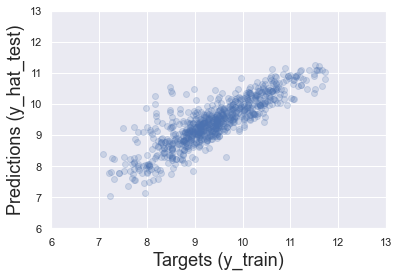

In [51]:
plt.figure(figsize=(13,8))
plt.figure()
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_train)', size=18)
plt.ylabel('Predictions (y_hat_test)', size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [52]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf

,Prediction
0,3945.764428
1,25394.935768
2,34773.198607
3,62425.396077
4,3422.281181
5,10558.895747
6,30005.070716
7,12089.019859
8,16894.533071
9,4998.994661


In [53]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3945.764428,NaN
1,25394.935768,NaN
2,34773.198607,13300.0
3,62425.396077,NaN
4,3422.281181,NaN
5,10558.895747,NaN
6,30005.070716,NaN
7,12089.019859,1400.0
8,16894.533071,NaN
9,4998.994661,NaN


In [54]:
y_test = y_test.reset_index(drop=True)
y_test

0       9.648595
1       9.961756
2      10.477288
3      11.196844
4       7.740664
5      10.021271
6      10.271597
7       9.375855
8       9.740910
9       8.853665
10      8.987197
11      8.366370
12      9.581904
13      8.853665
14      8.874868
15      8.699515
16      9.093807
17      8.294050
18     10.985276
19      8.839277
20     10.221941
21      9.268609
22      9.332558
23      8.006368
24      8.389360
25     10.666627
26      7.740664
27     10.146434
28      8.160518
29     10.373491
         ...    
744     8.465900
745    11.121697
746     8.748305
747     9.277999
748    11.080603
749     8.961879
750     8.160518
751    10.030120
752     8.006368
753     7.843849
754     8.516993
755     9.148465
756     8.536996
757    10.373491
758     8.987072
759     9.433484
760     9.464983
761     8.809863
762     9.035987
763    11.058795
764     9.546741
765    10.239960
766     8.160518
767     8.935904
768    10.077441
769     8.242756
770     9.159047
771     9.4572

In [55]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3945.764428,15500.00
1,25394.935768,21200.00
2,34773.198607,35500.00
3,62425.396077,72900.00
4,3422.281181,2300.00
5,10558.895747,22500.00
6,30005.070716,28900.00
7,12089.019859,11800.00
8,16894.533071,16999.00
9,4998.994661,7000.00


### Analyzing the prediction

In [56]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [57]:
df_pf['Difference%'] = np.absolute((df_pf['Residual']/df_pf['Target'])*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3945.764428,15500.00,11554.235572,74.543455
1,25394.935768,21200.00,-4194.935768,19.787433
2,34773.198607,35500.00,726.801393,2.047328
3,62425.396077,72900.00,10474.603923,14.368455
4,3422.281181,2300.00,-1122.281181,48.794834
5,10558.895747,22500.00,11941.104253,53.071574
6,30005.070716,28900.00,-1105.070716,3.823774
7,12089.019859,11800.00,-289.019859,2.449321
8,16894.533071,16999.00,104.466929,0.614547
9,4998.994661,7000.00,2001.005339,28.585791


In [58]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,774.000000,774.000000,774.000000,774.000000
mean,16117.723297,17817.537739,1699.814442,40.003962
std,13004.974142,18832.737322,10360.177769,69.060073
min,1124.710347,1200.000000,-33534.208414,0.012507
25%,7671.446597,6800.000000,-2239.031376,10.849213
50%,11955.367047,11500.000000,120.531449,23.962413
75%,20340.288721,22475.000000,3310.639312,41.124147
max,76455.214768,124000.000000,76948.540105,717.901542


In [59]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
424,12201.53,12200.00,-1.53,0.01
63,13002.30,12999.00,-3.30,0.03
164,7182.65,7200.00,17.35,0.24
737,6520.95,6500.00,-20.95,0.32
325,8966.02,9000.00,33.98,0.38
283,32354.81,32500.00,145.19,0.45
626,24911.71,24800.00,-111.71,0.45
286,3979.80,4000.00,20.20,0.51
8,16894.53,16999.00,104.47,0.61
252,29077.71,28900.00,-177.71,0.61
